In [104]:
#Lyric Sentiment Breakdown

In [190]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from stop_words import get_stop_words
nltk.download('wordnet')
import string
stop = get_stop_words('en')
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
import pandas as pd
import gensim
from gensim import corpora
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
from IPython.display import Image

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [147]:
DATA_PATH = '../data/'
fname = DATA_PATH + 'billboard_1970_current.csv'
df = pd.read_csv(fname,sep='@')

In [178]:
DATA_PATH = '../data/'
fname = DATA_PATH + 'billboard_1970_current_rept.csv'
df_rept = pd.read_csv(fname,sep='@')

In [107]:
# Cleaning and Data Preprocessing
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    normalized_split = normalized.split()
    # deviding the lyric into verse 1 and verse 2
    return [normalized_split[:int(len(normalized_split)/2)],normalized_split[int(len(normalized_split)/2):]]

In [108]:
def corpusExtraction(lyric):
    tmp = clean(lyric)
    ## Preparing Document-Term Matrix
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. 
    dictionary = corpora.Dictionary(tmp)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in tmp]

    ##Running LDA Model
    # create an object for LDA model and train it on Document-Term matrix. 
    # The training also requires few parameters as input which are explained in the above section. 
    # The gensim module allows both LDA model estimation from a training corpus and inference of 
    # topic distribution on new, unseen documents.

    # Creating the object for LDA model using gensim library
    Lda = gensim.models.ldamodel.LdaModel
    # Running and Trainign LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)
    print(ldamodel.print_topics(num_topics=4, num_words=3))
    
# https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

In [109]:
def topicModelling(artist, title):
    lyric = df.loc[(df.artist == artist) & (df.title == title),['lyric']].values[0][0]
    corpusExtraction(lyric)

In [110]:
topicModelling('Michael Jackson', 'Man In The Mirror')

[(0, '0.072*"na" + 0.062*"change" + 0.054*"make"'), (1, '0.009*"widow" + 0.009*"that" + 0.009*"blind"'), (2, '0.009*"one" + 0.009*"street" + 0.009*"widow"')]


In [111]:
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)', 'heart' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

In [112]:
def word_feats(words):
    return dict([(word, True) for word in words])

def sentimentAnalysisHelper(lyric):
    # train positive and negative features
    positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
    negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
    neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
    
    train_set = negative_features + positive_features + neutral_features
    classifier = NaiveBayesClassifier.train(train_set)

    # setting up lyric materials
    lyric = lyric.lower()
    words = lyric.split(' ')
    
    # Sentiment analysis
    neg = 0
    pos = 0
    for word in words:
        classResult = classifier.classify( word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1

    print('Positive: ' + str(round(float(pos)/len(words)*100,2)) + "%")
    print('Negative: ' + str(round(float(neg)/len(words)*100,2)) + "%")

In [151]:
def sentimentAnalysis(artist, title):
    lyric = df.loc[(df.artist == artist) & (df.title == title),['lyric']].values[0][0]
    sentimentAnalysisHelper(lyric)

In [ ]:
## Importing Repetition Score 

In [150]:
def printReptScore(artist, title):
    print("repetition score for ", artist, title, df_rept.loc[(df.artist == artist) & (df.title == title),['rept_score']].values[0][0])

In [170]:
def printLyrics(artist, title):
    print(df_rept.loc[(df.artist == artist) & (df.title == title),['lyric']].values[0][0])

Positive: 69.18%
Negative: 7.06%


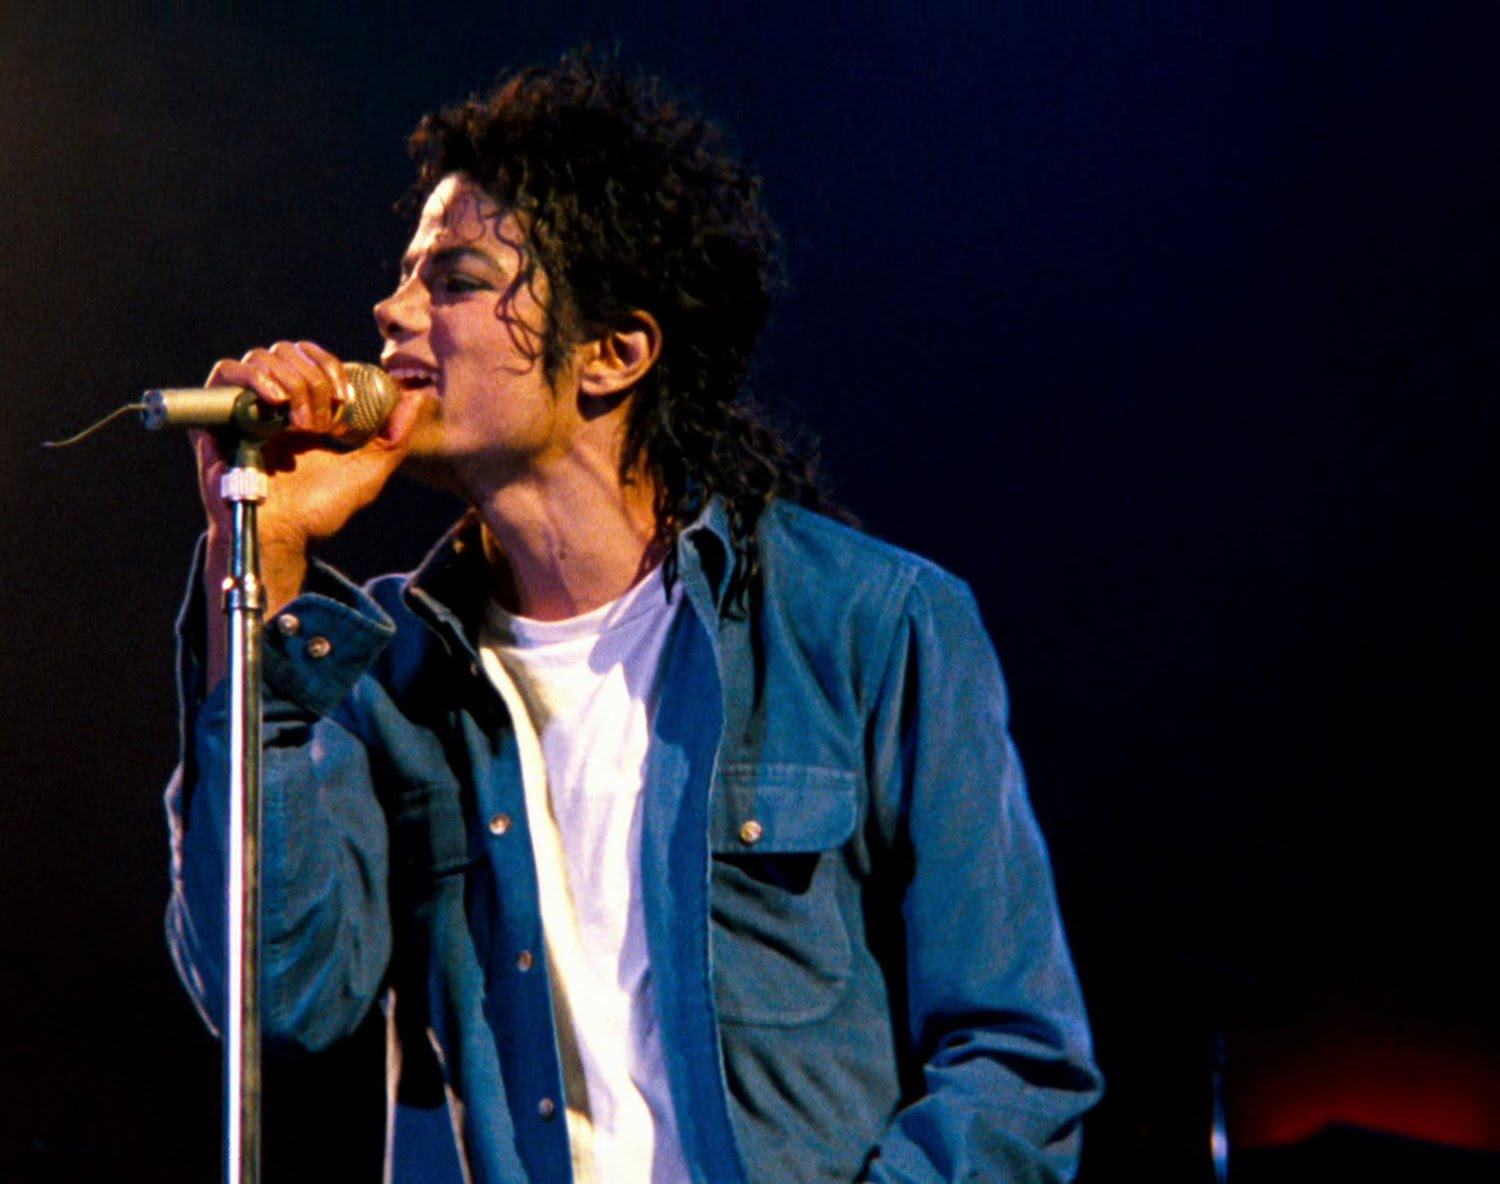

In [196]:
Image(filename='../image/mj.jpg',width = 300, height = 300)

In [194]:
sentimentAnalysis('Michael Jackson', 'Man In The Mirror')
topicModelling('Michael Jackson', 'Man In The Mirror')
printReptScore('Michael Jackson', 'Man In The Mirror')

Positive: 69.18%
Negative: 7.06%
[(0, '0.009*"heart" + 0.009*"time" + 0.009*"right"'), (1, '0.045*"make" + 0.045*"change" + 0.045*"na"'), (2, '0.089*"na" + 0.069*"change" + 0.060*"yeah"')]
repetition score for  Michael Jackson Man In The Mirror 5.14444444444


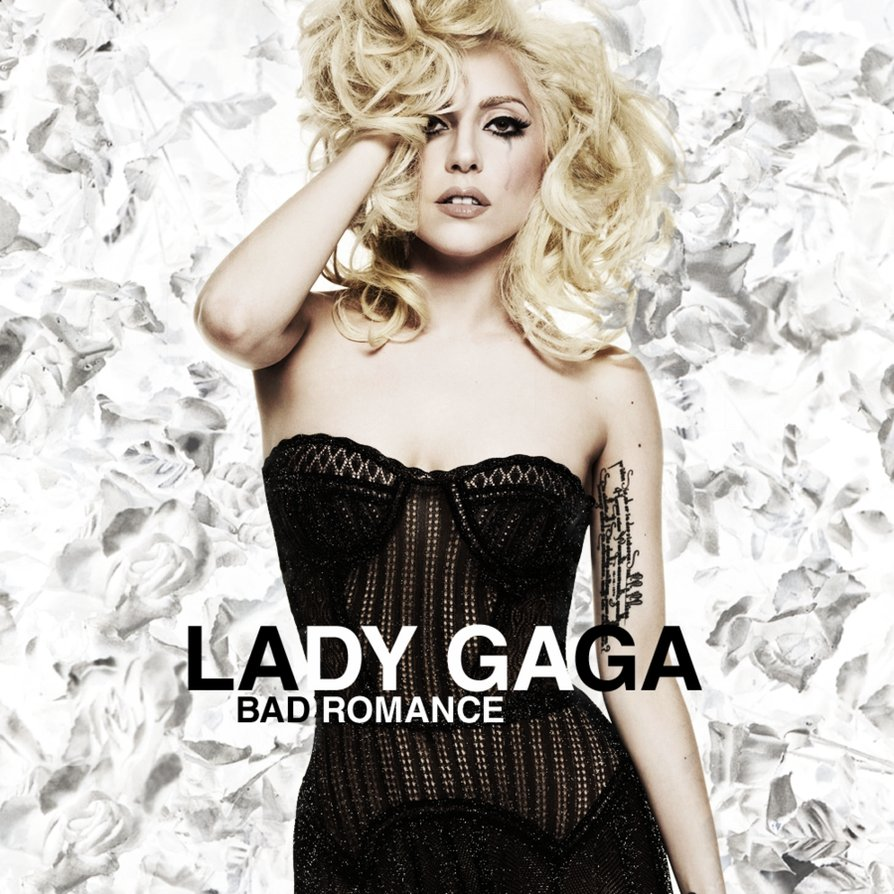

In [197]:
Image(filename='../image/gaga.jpg',width = 300, height = 300)

In [185]:
topicModelling("Lady Gaga", "Bad Romance")
sentimentAnalysis("Lady Gaga", "Bad Romance")
printReptScore("Lady Gaga", "Bad Romance")

[(0, '0.107*"bad" + 0.102*"romance" + 0.096*"want"'), (1, '0.168*"love" + 0.157*"want" + 0.063*"ra"'), (2, '0.015*"lover" + 0.015*"free" + 0.015*"bitch"')]
Positive: 60.82%
Negative: 19.69%
repetition score for  Lady Gaga Bad Romance 3.57943925234


In [179]:
topicModelling("Chumbawamba","Tubthumping")
sentimentAnalysis("Parliament","Tear The Roof Off The Sucker")
printReptScore("69 Boyz","Tootsee Roll")
printLyrics("Parliament","Tear The Roof Off The Sucker")

[(0, '0.030*"2012" + 0.030*"o" + 0.030*"neighbour"'), (1, '0.168*"get" + 0.085*"knocked" + 0.085*"never"'), (2, '0.030*"neighbour" + 0.030*"o" + 0.030*"march"')]
Positive: 69.96%
Negative: 9.63%
repetition score for  69 Boyz Tootsee Roll 3.06796116505
 was a Love is thicker than water You are this dreamer's only dream Heaven's angel, devil's daughter Say, my mind, should I go with her on silent nights She'll drive me crazy in the end And I should leave this paradise But I can't leave her While I need her more than she needs you That's what I'm living for Love is higher than a mountain Love is thicker than water You are this dreamer's only dream Heaven's angel, devil's daughter Say, my thought, should I find out she don't care at all She'll leave me crying in the end Wandering through the afterglow But I can't leave her While I need her more than she needs you That's what I'm praying for Love is higher than a mountain Love is thicker than water You are this dreamer's only dream Heaven's

In [183]:

df_rept.sort(columns='rept_score',ascending=True)

#display(df.sort(columns='rept_score',ascending=False))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,Unnamed: 0,position,year,title,artist,lyric,decade,rept_score
1058,1211,12,1982,Chariots Of Fire,Vangelis,"was a April 24, 2012",1980,1.000000
1842,2063,64,1990,Free Fallin',Tom Petty,was a,1990,1.000000
704,820,21,1978,Feels So Good,Chuck Mangione,was a,1970,1.000000
1566,1754,55,1987,Songbird,Kenny G,was a,1980,1.000000
465,550,51,1975,Dynomite,Bazuka,was a,1970,1.000000
324,389,90,1973,Also Sprach Zarathustra (2001),Deodato,was a,1970,1.000000
255,315,16,1973,Frankenstein,Edgar Winter Group,"December 17, 2008 was a",1970,1.000000
825,948,49,1979,Music Box Dancer,Frank Mills,was a,1970,1.000000
843,966,67,1979,Renegade,Styx,"August 17, 2008 was a",1970,1.000000
856,979,80,1979,Rise,Herb Alpert,was a,1970,1.000000
